<a href="https://colab.research.google.com/github/TomTremerel/Energy_Consumption_Predictor.github/blob/main/Project_Tom_Tremerel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

**STEP** **1** **Load the dataset**

In [36]:
df = pd.read_csv("/content/Energy_consumption_dataset.csv")

**STEP 2 Take a look to the dataset**

In [42]:
df

,Month,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,Saturday,0,25.139433,43.431581,1565.693999,5,1,0,2.774699,75.364373
1,1,Saturday,0,27.731651,54.225919,1411.064918,1,1,1,21.831384,83.401855
2,1,Saturday,0,28.704277,58.907658,1755.715009,2,0,0,6.764672,78.270888
3,1,Saturday,0,20.080469,50.371637,1452.316318,1,0,1,8.623447,56.519850
4,1,Saturday,0,23.097359,51.401421,1094.130359,9,1,0,3.071969,70.811732
...,...,...,...,...,...,...,...,...,...,...,...
4995,12,Sunday,1,26.338718,52.580000,1563.567259,7,1,1,20.591717,70.270344
4996,12,Monday,0,20.007565,42.765607,1999.982252,5,0,1,7.536319,73.943071
4997,12,Thursday,1,26.226253,30.015975,1999.982252,5,0,1,28.162193,85.784613
4998,12,Saturday,1,24.673206,50.223939,1240.811298,2,1,1,20.918483,63.784001


In [23]:
df.shape

(5000, 12)

In [45]:
DD = df.describe()
DD

,Month,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,6.251200,0.468800,24.946823,45.478146,1507.403201,4.576000,0.50000,0.491400,15.201195,76.794919
std,3.588687,0.499076,3.041678,8.972690,293.147209,2.906185,0.50005,0.499976,9.157038,9.231573
min,1.000000,0.000000,20.007565,30.015975,1000.512661,0.000000,0.00000,0.000000,0.006642,53.263278
25%,3.000000,0.000000,22.453790,38.111104,1253.906598,2.000000,0.00000,0.000000,7.477928,70.419588
50%,6.000000,0.000000,24.831846,45.793124,1513.581105,5.000000,0.50000,0.000000,15.343830,76.696267
75%,9.000000,1.000000,27.427281,52.696651,1754.846457,7.000000,1.00000,1.000000,22.889997,83.246274
max,12.000000,1.000000,29.998671,59.969085,1999.982252,9.000000,1.00000,1.000000,29.965327,99.201120


In [73]:
df.dtypes

,0
Month,int64
DayOfWeek,object
Holiday,int64
Temperature,float64
Humidity,float64
SquareFootage,float64
Occupancy,int64
HVACUsage,int64
LightingUsage,int64
RenewableEnergy,float64


In [26]:
df.isnull().sum()

,0
Month,0
Hour,0
DayOfWeek,0
Holiday,0
Temperature,0
Humidity,0
SquareFootage,0
Occupancy,0
HVACUsage,0
LightingUsage,0


By chance, in this case there is no missing value. 🙂


In [16]:
df.duplicated().sum()


0

This dataset seems to be already cleaned, there are no duplicated values. But will prepare the data to train our model later

**STEP 3 Prepare the data**

In [38]:
df["HVACUsage"] = df["HVACUsage"].map({'On': int(1), 'Off': int(0)})
df["LightingUsage"] = df["LightingUsage"].map({'On': 1, 'Off': 0})
df["Holiday"] = df["Holiday"].map({'Yes': 1, 'No': 0})

In [41]:
df = df.drop(columns=["Hour"])

**STEP 4 EDA**

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

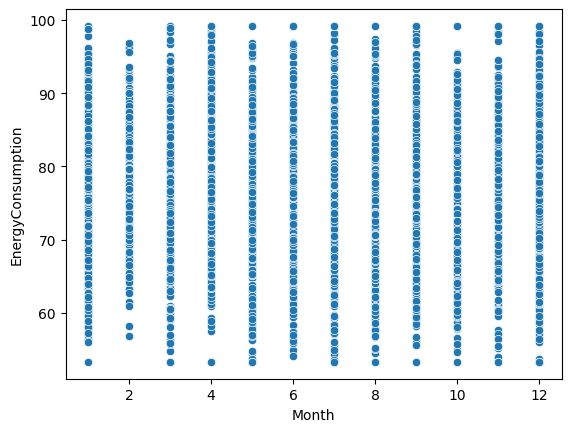

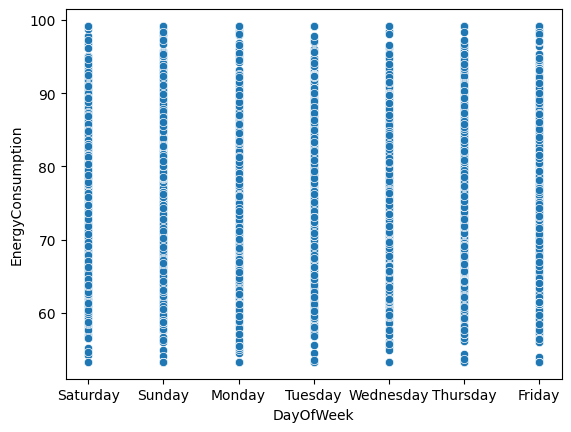

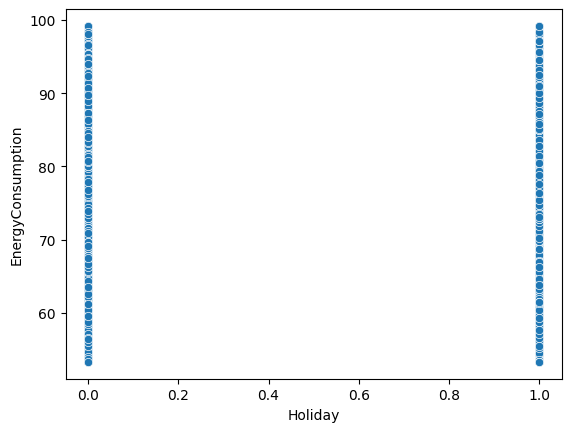

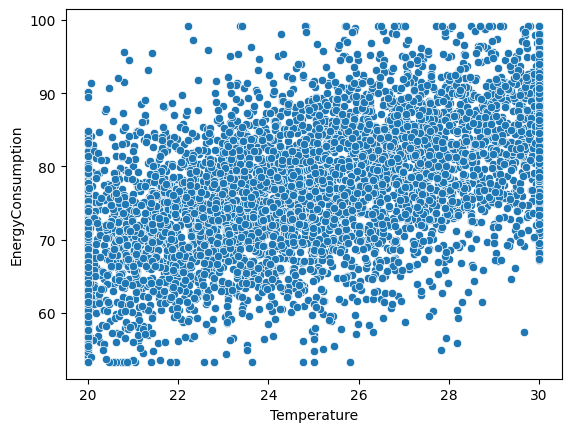

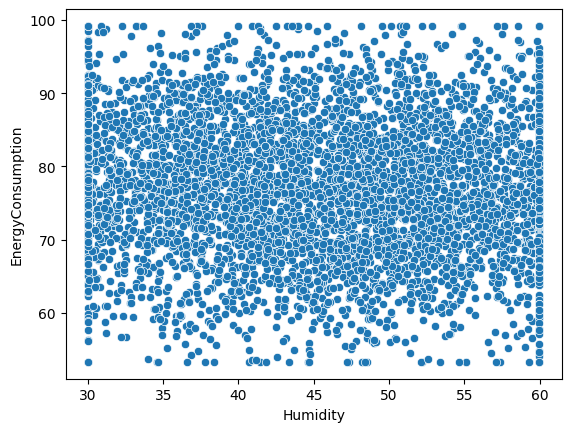

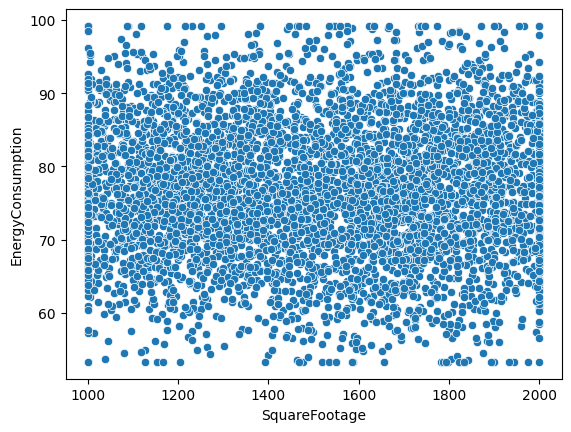

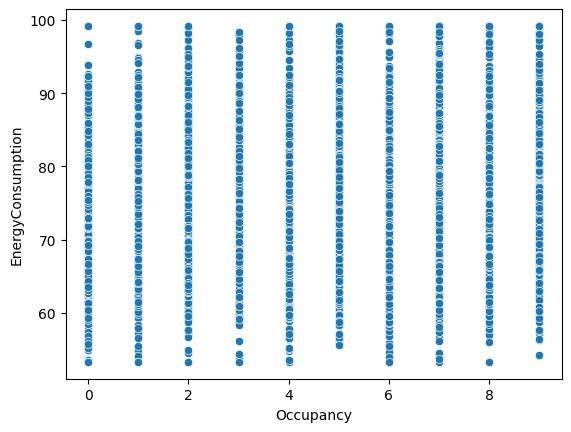

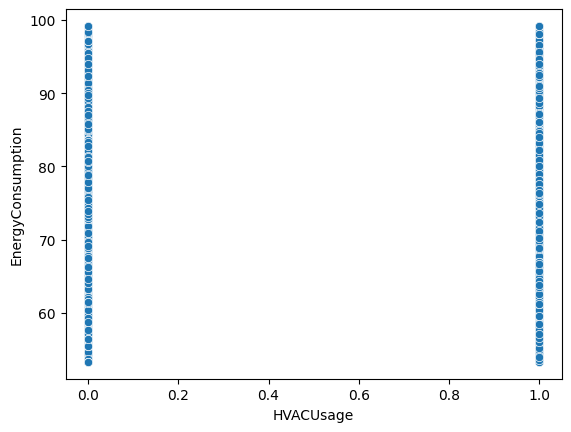

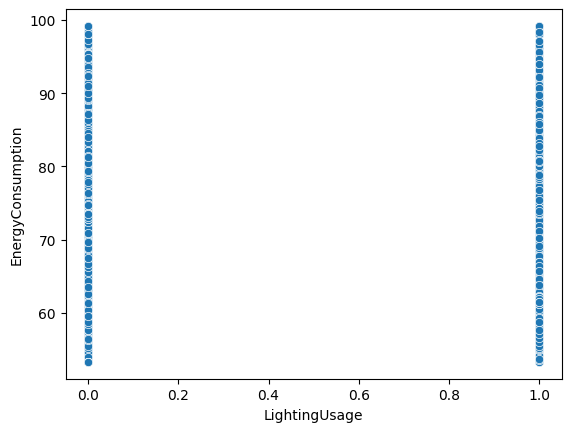

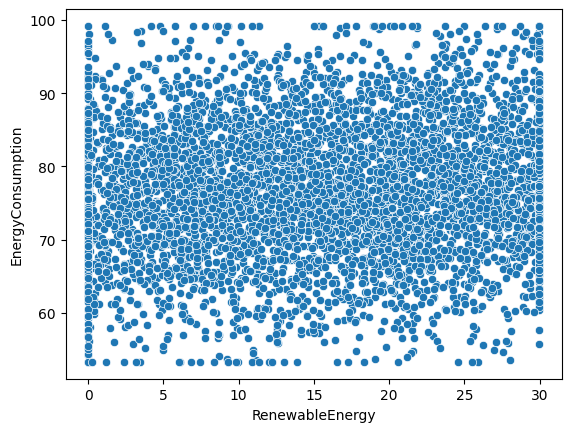

In [47]:
for i in df :
  if i != "EnergyConsumption" :
    sns.scatterplot(x=df[i],y=df["EnergyConsumption"], data=df)
    plt.show()

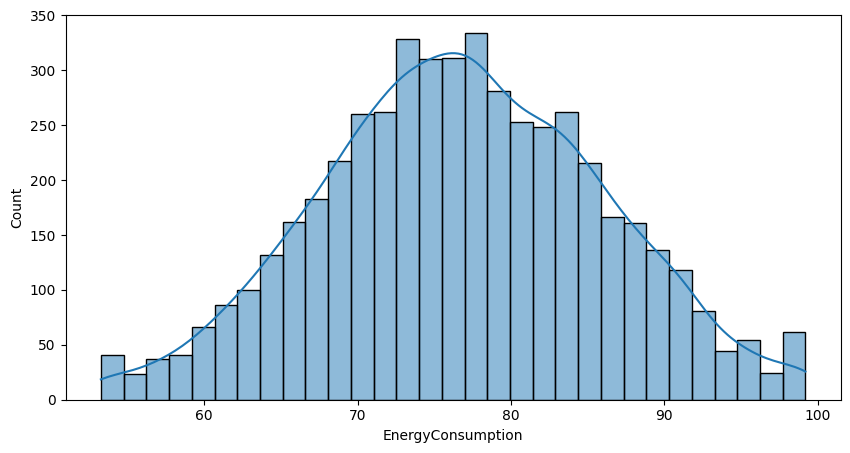

In [51]:
plt.figure(figsize=(10,5))
sns.histplot(df['EnergyConsumption'], kde=True)
plt.show()

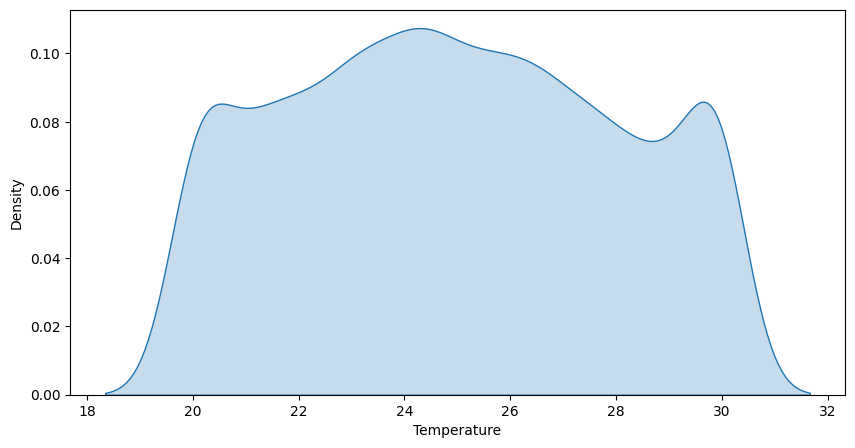

In [52]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['Temperature'], fill=True)
plt.show()

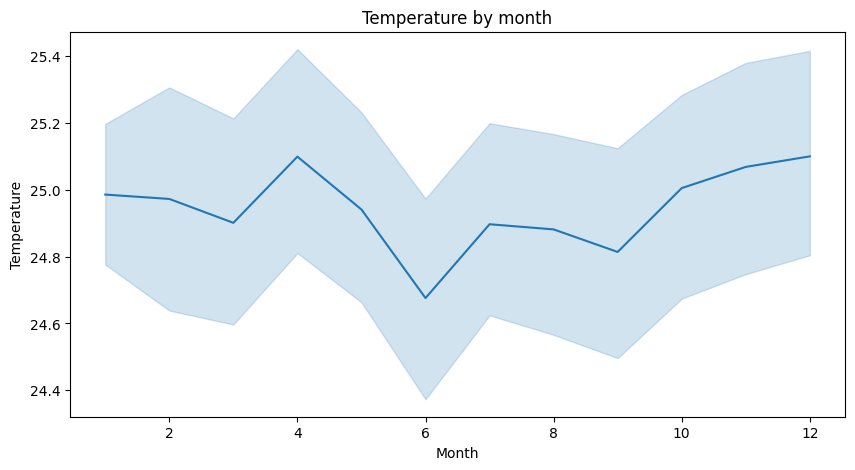

In [58]:
plt.figure(figsize=(10,5))
sns.lineplot(y=df['Temperature'], x=df['Month'],data=df)
plt.title('Temperature by month')
plt.show()

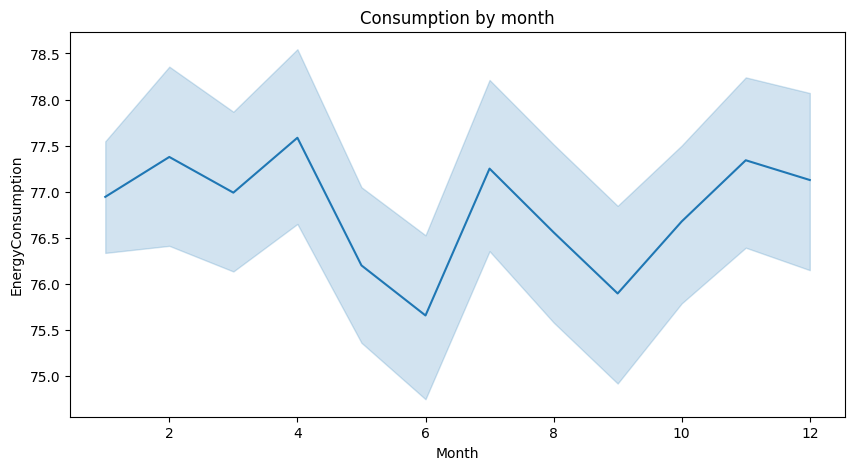

In [59]:
plt.figure(figsize=(10,5))
sns.lineplot(y=df['EnergyConsumption'], x=df['Month'],data=df)
plt.title('Consumption by month')
plt.show()

<Axes: >

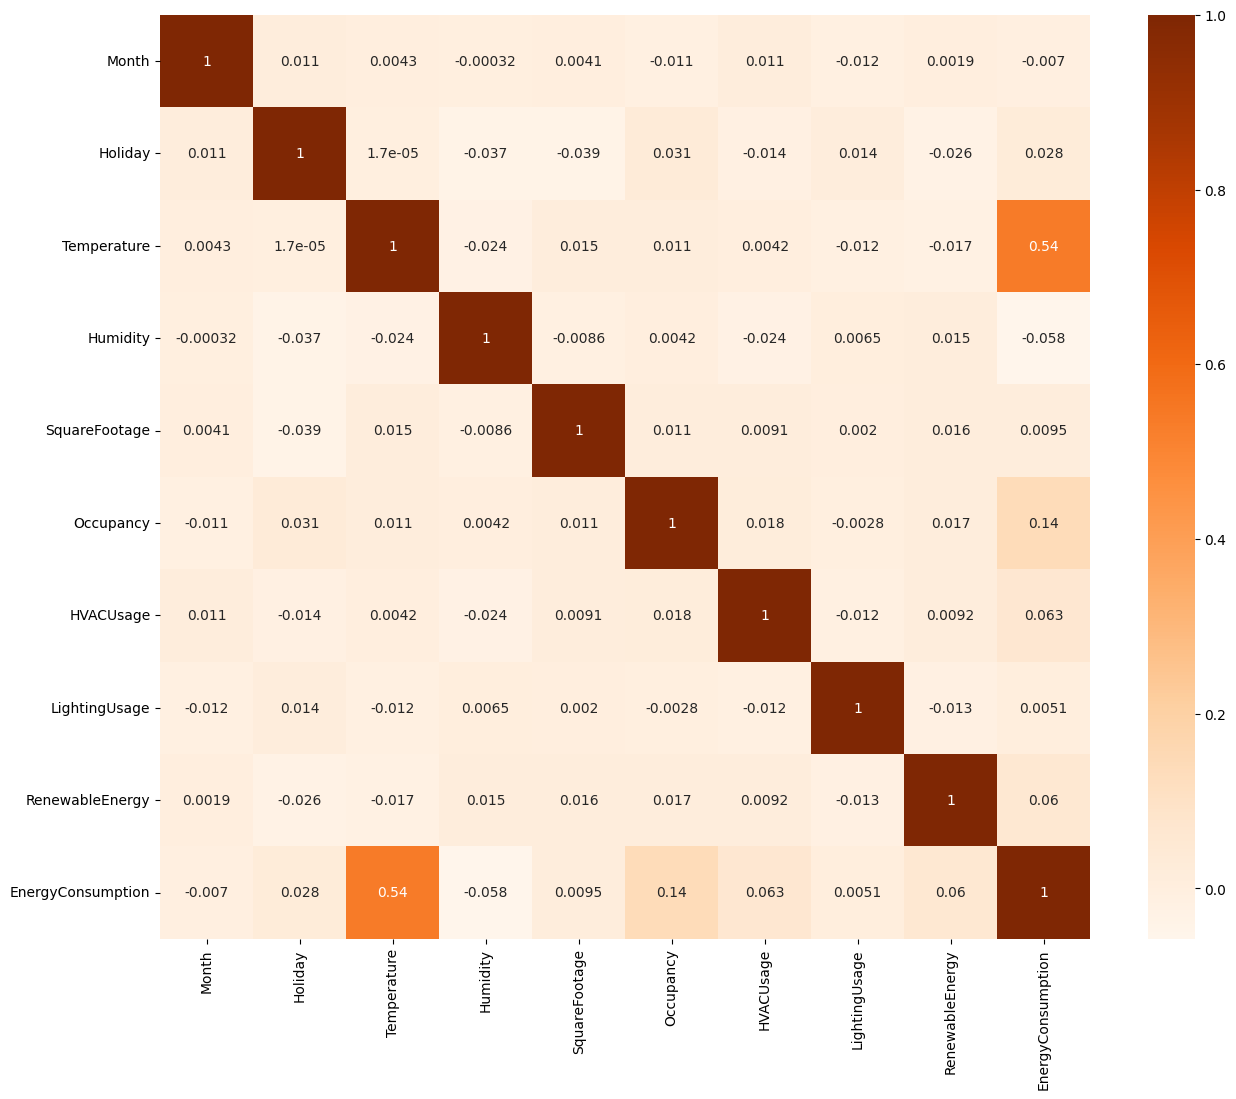

In [65]:
cordf = df.drop(columns =['DayOfWeek'])
correlation_matrix = cordf.corr()
plt.figure(figsize=(15,12))
sns.heatmap(correlation_matrix, annot=True, cmap='Oranges')

**STEP 5 Transform my DF into a relational DB and do some SQL queries**


In [112]:
import sqlalchemy as sa
from sqlalchemy import Column, Integer, String, Float, Table, text

In [113]:
 engine = sa.create_engine("sqlite:///sqldata.db")
 connection = engine.connect()

In [114]:
metadata = sa.MetaData()

In [115]:
processed_table = Table(
    'slqdata', metadata,
    Column('id', Integer, primary_key=True, autoincrement=True),
    Column('Month', Integer),
    Column('DayOfWeek', String(30)),
    Column('Holiday', Integer),
    Column('Temperature', Float),
    Column('Humidity', Float),
    Column('SquareFootage', Float),
    Column('Occupancy', Integer),
    Column('HVACUsage', Integer),
    Column('LightingUsage', Integer),
    Column('RenewableEnergy',Float),
    Column('EnergyConsumption', Float)
)

In [116]:
metadata.create_all(engine)

In [119]:
df.to_sql('sqldata', con=connection, if_exists='replace', index=False)

5000

In [122]:
result = connection.execute(text('''SELECT * FROM sqldata'''))
result